<a href="https://colab.research.google.com/github/NiccoloSalvi/naml/blob/main/LS_ridge_kernel_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Moore-Penrose pseudo inverse

In [25]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt

## Write a function computing the Moore-Penrose pseudo inverse, exploiting the full SVD.

### Review of the Moore-Penrose Pseudo-Inverse:
The **Moore-Penrose pseudo-inverse** is a matrix that generalizes the concept of the inverse matrix to include non-square or singular matrices. For a given matrix $ A $, its pseudo-inverse, denoted as $ A^+ $, satisfies the following four properties:

1. $ A A^+ A = A $
2. $ A^+ A A^+ = A^+ $
3. $ (A A^+)^T = A A^+ $
4. $ (A^+ A)^T = A^+ A $

The **pseudo-inverse** is particularly useful in solving systems of linear equations that do not have a unique solution or in finding the least-squares solution. The most common way to compute the pseudo-inverse is by using the **Singular Value Decomposition (SVD)** of the matrix $ A $.

### Computing the Pseudo-Inverse Using SVD:
Given a matrix $ A $, the SVD is represented as:

$ A = U \Sigma V^T $

Where:
- $ U $ is an orthogonal matrix of size $(m, m)$.
- $ \Sigma $ is a diagonal matrix with **singular values** of $ A $ along its diagonal (shape $(m, n)$).
- $ V $ is an orthogonal matrix of size $(n, n)$.
  
The **pseudo-inverse** of $ A $ using SVD is defined as:

$ A^+ = V \Sigma^+ U^T $

Where $ \Sigma^+ $ is constructed by taking the reciprocal of each non-zero singular value in $ \Sigma $ and leaving zeros intact. This method works for both square and non-square matrices, making it robust and versatile for a wide range of linear algebra problems.

### Detailed Explanation:
1. **Step 1: SVD Decomposition**
   ```python
   U, s, VT = np.linalg.svd(A, full_matrices=False)
   ```
   - This line performs the **Singular Value Decomposition (SVD)** of the matrix `A`.
   - `U`: Orthogonal matrix of left singular vectors with shape `(m, r)` (where `m` is the number of rows of `A`).
   - `s`: Singular values of `A` stored in a 1D array of length `r`.
   - `VT`: Transpose of the orthogonal matrix of right singular vectors, with shape `(r, n)`.

2. **Step 2: Inverting the Singular Values**
   ```python
   s[s > 0] = 1 / s[s > 0]
   ```
   - The singular values in `s` are **inverted** to construct the diagonal matrix $ \Sigma^+ $.
   - For each singular value that is greater than zero (`s > 0`), replace it with its reciprocal `1/s`.
   - Singular values that are zero remain unchanged, which prevents division by zero errors.

3. **Step 3: Constructing the Diagonal Matrix $ \Sigma^+ $**
   ```python
   Σ_pinv = la.diagsvd(s, A.shape[1], A.shape[0])
   ```
   - `la.diagsvd(s, A.shape[1], A.shape[0])` constructs a **diagonal matrix** $ \Sigma^+ $ using the inverted singular values stored in `s`.
   - `la.diagsvd(s, n, m)`: Creates a diagonal matrix of shape `(n, m)` (transpose of the original matrix `A`'s shape).
   - This diagonal matrix has zeros everywhere except along its diagonal, where it places the values from `1/s`.

4. **Step 4: Constructing the Pseudo-Inverse**
   ```python
   return VT.T @ Σ_pinv @ U.T
   ```
   - The final step computes the Moore-Penrose pseudo-inverse using the formula:

     $ A^+ = V \Sigma^+ U^T $

   - `VT.T`: Transpose of the right singular matrix `V`.
   - `Σ_pinv`: The diagonal matrix with the reciprocals of the singular values.
   - `U.T`: Transpose of the left singular matrix `U`.
   - The result is a matrix of shape `(n, m)`, which is the **pseudo-inverse** of the original matrix `A`.

### Function Output:
The function returns the Moore-Penrose **pseudo-inverse** of the input matrix `A`. This matrix is particularly useful for solving linear systems and finding the least-squares solution when `A` is non-square or rank-deficient.

### Summary:
- The code uses **SVD decomposition** to compute the Moore-Penrose pseudo-inverse.
- It inverts the non-zero singular values and constructs a diagonal matrix.
- The final pseudo-inverse is calculated as $ A^+ = V \Sigma^+ U^T $.

In [26]:
def my_pinv1(A):
    """
    Compute the Moore-Penrose pseudo-inverse of matrix A using SVD.

    Parameters:
    A : ndarray
        The input matrix for which we want to compute the pseudo-inverse.

    Returns:
    A_pinv : ndarray
        The Moore-Penrose pseudo-inverse of the input matrix A.
    """

    # Step 1: Perform Singular Value Decomposition (SVD)
    # U: left singular vectors (m x r) matrix
    # s: array of singular values (length r)
    # VT: right singular vectors (r x n) matrix (transposed)
    U, s, VT = np.linalg.svd(A)

    # Step 2: Compute the inverse of non-zero singular values in s
    # Replace each non-zero singular value in `s` with its reciprocal (1/s)
    # This step converts `s` into the diagonal matrix needed for the pseudo-inverse
    s[s > 0] = 1 / s[s > 0]  # Invert only non-zero singular values to avoid division by zero

    # Step 3: Construct the diagonal matrix Σ⁺ from the inverted singular values
    # Use `la.diagsvd` to create Σ⁺ of shape (n, m) with the reciprocals of singular values in `s`
    # `la.diagsvd` creates a full matrix with zeros everywhere except the diagonal
    # Shape is determined based on the dimensions of A: (n, m) where n = columns, m = rows
    Σ_pinv = la.diagsvd(s, A.shape[1], A.shape[0])

    # Step 4: Compute the Moore-Penrose pseudo-inverse using the formula: A⁺ = V @ Σ⁺ @ U^T
    # Return the product of the transposed right singular matrix, Σ⁺, and the transposed left singular matrix
    # Resulting shape of A⁺: (n, m), which is the transpose shape of the original matrix A
    return VT.T @ Σ_pinv @ U.T

## Write now a function computing the Moore-Penrose pseudo inverse, exploiting the reduced SVD.

In [27]:
def my_pinv2(A):
    U, s, VT = np.linalg.svd(A, full_matrices = False)
    s[s > 0] = 1/s[s > 0]
    return VT.T @ np.diag(s) @ U.T

Generate a random matrix $A$ (with elements sampled from a standard Gaussian distribution) with 5 rows and 4 columns. Compute its Moore-Penrose pseudo inverse thorugh the two functions above defined, and compare the result with the function `numpy.linalg.pinv` (see [Documentation](https://numpy.org/doc/stable/reference/generated/numpy.linalg.pinv.html)).

In [28]:
A = np.random.randn(5,4)
Apinv0 = np.linalg.pinv(A)
Apinv1 = my_pinv1(A)
Apinv2 = my_pinv2(A)

print(np.linalg.norm(Apinv0 - Apinv1) / np.linalg.norm(Apinv0))
print(np.linalg.norm(Apinv0 - Apinv2) / np.linalg.norm(Apinv0))

8.307031177867547e-17
8.307031177867547e-17


Compare the three implementations performances through the Google Colab magic command `%timeit`.

In [29]:
%timeit np.linalg.pinv(A)

59.9 µs ± 11.5 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [30]:
%timeit my_pinv1(A)

45.2 µs ± 1.43 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [31]:
%timeit my_pinv2(A)

34.7 µs ± 1.32 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


# Least-square regression

Consider the linear model
$$
y = mx + q.
$$
where $m = 2$ and $q = 3$.

Generate $N = 100$ points $x_i$, sampling from a standard Gaussian distribution, and the associated $y_i$. Then, add a synthetic noise ($\epsilon_i$) by sampling from a Gaussian distribution with zero mean and standard deviation $\sigma = 2$. Plot the noisy data $(x_i, \tilde{y}_i)$, where $\tilde{y}_i = y_i + \epsilon_i$, in the $(x,y)$ plane, together with the line $y = mx + q$.

In [32]:
m = 2.0
q = 3.0
N = 100
noise = 2.0

X = np.random.randn(N)
Y = m*X + q + noise * np.random.randn(N)

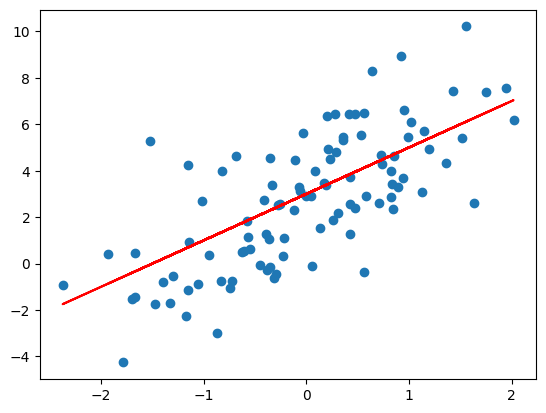

In [33]:
plt.scatter(X, Y)
plt.plot(X, m * X + q, color = 'red')

Using the previously implemented functions to compute the Moore-Penrose pseudo inverse, solve the least-squares problem
$$
\min_{m,q} \sum_{i=1}^N (\tilde{y}_i - (m x_i + q))^2
$$
and display the regression line superimposed to the noisy data and the exact model.

In [34]:
Phi = np.block([X[:, None], np.ones((N, 1))]) # equivalent I can use np.column_stack((X, np.ones(N)))
z = my_pinv2(Phi) @ Y
m_hat = z[0]
q_hat = z[1]

print("m_hat = %f" %m_hat)
print("q_hat = %f" %q_hat)

m_hat = 2.213222
q_hat = 2.771912


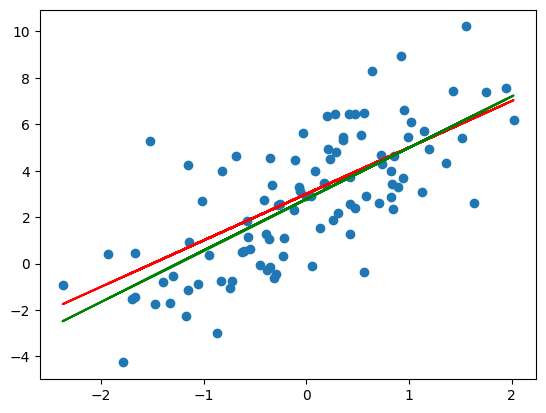

In [35]:
plt.scatter(X, Y)
plt.plot(X, m * X + q, color = "red")
plt.plot(X, m_hat * X + q_hat, color = "green")

Repeat the excercise by solving the normal equations. Compare the results

In [36]:
z2 = np.linalg.solve(Phi.T @ Phi, Phi.T @ Y)
np.linalg.norm(z2 - z)

1.9860273225978185e-15

# Ridge regression and Kernel regression

$$
y = f(x) = \tanh(2x - 1).
$$

Generate $N = 100$ points $x_i$, sampling from a standard Gaussian distribution, and the associated $y_i$. Then, add a synthetic noise ($\epsilon_i$) by sampling from a Gaussian distribution with zero mean and standard deviation $\sigma = 0.1$. Plot the noisy data $(x_i, \tilde{y}_i)$, where $\tilde{y}_i = y_i + \epsilon_i$, in the $(x,y)$ plane.

Then, generate 1000 testing points, uniformly distributed in the interval $[-3,3]$, and display the function $y = f(x)$ in correspondence of the testing points.

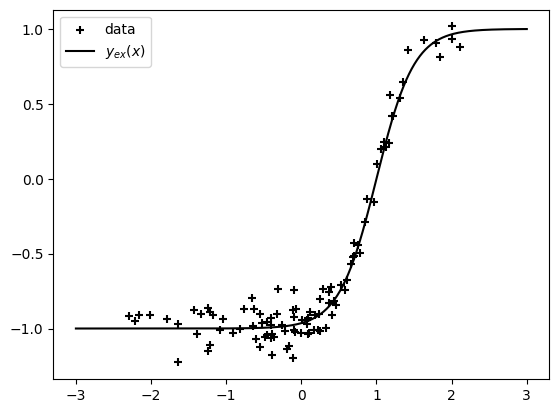

In [37]:
# y_ex = lambda x: np.tanh(2*(x - 1))

N = 100
X = np.random.standard_normal(N)
# X = np.random.normal(loc=0, scale=1, size=N) # equivalent method
# X = np.random.rand(N) # equivalent method

Y = np.tanh(2 * (X - 1))
# Y = y_ex(X) # using lambda function

noise = np.random.normal(loc=0, scale=0.1, size=N)
Y_noise = Y + noise

N_test = 1000
# np.linspace() is often preferred for plotting smooth functions as it provides a clearer
# representation of the function's shape.
# However, np.random.uniform() can be useful for generating random test points or
# for certain types of simulations.
X_test = np.linspace(start=-3, stop=3, num=N_test)
Y_test = np.tanh(2 * (X_test - 1)) # alternately use lambda function y_ex

plt.scatter(X, Y_noise, marker = '+', color = 'black', label = 'data')
plt.plot(X_test, Y_test, color = 'black', label = '$y_{ex}(x)$')
plt.legend()

Proceeding as in the previous exercise, compute the regression line resulting from the **least squares regression** of data $(x_i, \tilde{y}_i)$. Plot the resulting regression line.

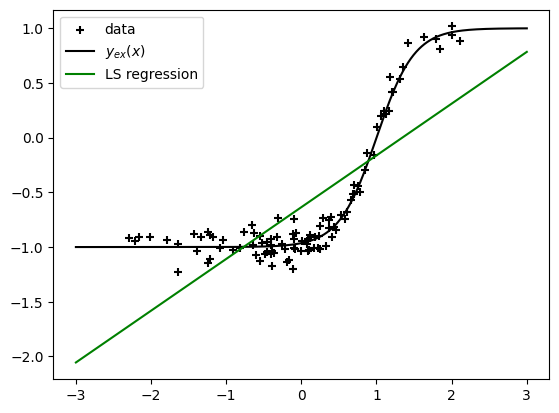

In [38]:
A = np.column_stack((X, np.ones(N)))
m_est, q_est = my_pinv2(A) @ Y_noise
Y_test_LS = m_est * X_test + q_est

plt.scatter(X, Y_noise, marker='+', color='black', label='data')
plt.plot(X_test, Y_test, color='black', label='$y_{ex}(x)$')
plt.plot(X_test, Y_test_LS, color='green', label='LS regression')
plt.legend()

Let us now consider **ridge regression**, corresponding to a regularizaton parameter $\lambda = 1.0$. Compare the obtained regression line with the one obtained through least squares regression.

0.46836440263933565 -0.6292500326896577


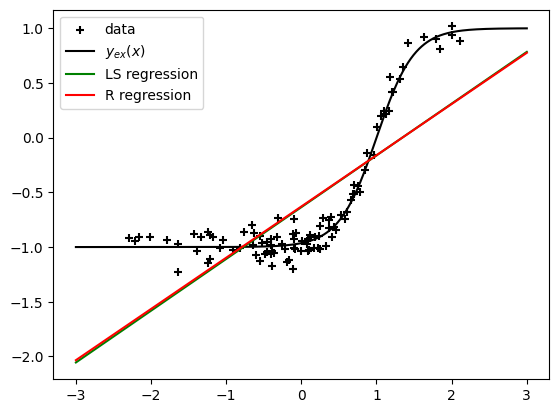

In [39]:
lam = 1.0
m_est_rr, q_est_rr = np.linalg.inv(A.T @ A + lam * np.identity(A.shape[1])) @ A.T @ Y_noise
Y_test_RR = m_est_rr * X_test + q_est_rr
print(m_est_rr, q_est_rr)

plt.scatter(X, Y_noise, marker='+', color='black', label='data')
plt.plot(X_test, Y_test, color='black', label='$y_{ex}(x)$')
plt.plot(X_test, Y_test_LS, color='green', label='LS regression')
plt.plot(X_test, Y_test_RR, color='red', label='R regression')
plt.legend()

Consider now **kernel regression**.

1. Consider first the scalar product kernel
$$K(x_i,x_j) = x_i x_j + 1.$$
Compute the regression function and compare the result with the ones obtained at the previous point. How do the results compare?

2. Consider then the higher-order scalar product kernel, for $q > 1$.
$$K(x_i,x_j) = (x_i x_j + 1)^q.$$

3. Consider finally a Gaussian kernel, for $\sigma > 0$.
$$K(x_i,x_j) = \exp\left(-\frac{(x_i - x_j)^2}{2 \sigma^2}\right).$$

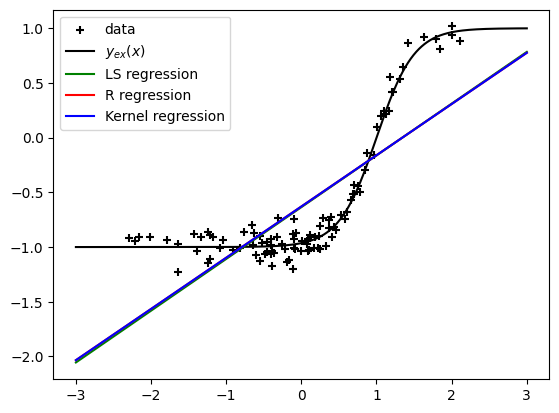

In [46]:
# 1. kernel regression
lambda_reg = 1.0

kernel_function = lambda xi, xj : xi * xj + 1
K = np.array([[kernel_function(X[i], X[j]) for j in range(N)] for i in range(N)])
alpha = np.linalg.inv(K + lambda_reg * np.identity(N)) @ Y_noise

K_test = np.array([[kernel_function(X_test[i], X[j]) for j in range(N)] for i in range(N_test)])
Y_test_KR = K_test @ alpha

plt.scatter(X, Y_noise, marker='+', color='black', label='data')
plt.plot(X_test, Y_test, color='black', label='$y_{ex}(x)$')
plt.plot(X_test, Y_test_LS, color='green', label='LS regression')
plt.plot(X_test, Y_test_RR, color='red', label='R regression')
plt.plot(X_test, Y_test_KR, color='blue', label='Kernel regression')
plt.legend()

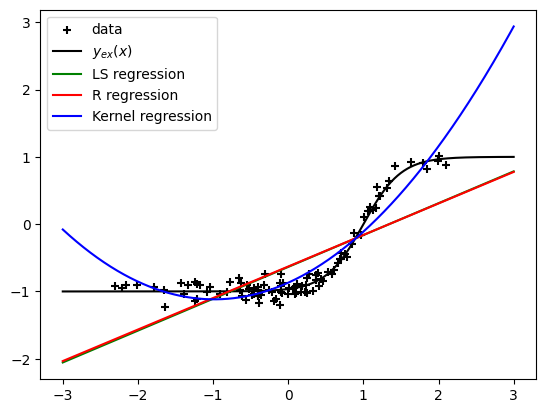

In [47]:
# 2. kernel regression
lambda_reg = 1.0
q = 2.0

kernel_function = lambda xi, xj : (xi * xj + 1) ** q
K = np.array([[kernel_function(X[i], X[j]) for j in range(N)] for i in range(N)])
alpha = np.linalg.inv(K + lambda_reg * np.identity(N)) @ Y_noise

K_test = np.array([[kernel_function(X_test[i], X[j]) for j in range(N)] for i in range(N_test)])
Y_test_KR = K_test @ alpha

plt.scatter(X, Y_noise, marker='+', color='black', label='data')
plt.plot(X_test, Y_test, color='black', label='$y_{ex}(x)$')
plt.plot(X_test, Y_test_LS, color='green', label='LS regression')
plt.plot(X_test, Y_test_RR, color='red', label='R regression')
plt.plot(X_test, Y_test_KR, color='blue', label='Kernel regression')
plt.legend()

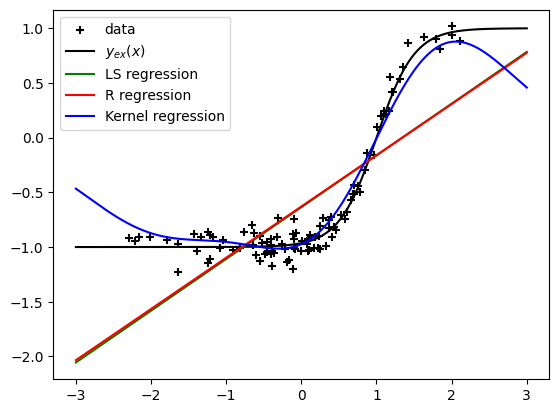

In [49]:
# 3. kernel function

sigma_kernel = 1.0
lambda_reg = 1.0

kernel_function = lambda xi, xj : np.exp(-((xi - xj) ** 2) / (2 * sigma_kernel ** 2))
K = np.array([[kernel_function(X[i], X[j]) for j in range(N)] for i in range(N)])
alpha = np.linalg.inv(K + lambda_reg * np.identity(N)) @ Y_noise

K_test = np.array([[kernel_function(X_test[i], X[j]) for j in range(N)] for i in range(N_test)])
Y_test_KR = K_test @ alpha

plt.scatter(X, Y_noise, marker='+', color='black', label='data')
plt.plot(X_test, Y_test, color='black', label='$y_{ex}(x)$')
plt.plot(X_test, Y_test_LS, color='green', label='LS regression')
plt.plot(X_test, Y_test_RR, color='red', label='R regression')
plt.plot(X_test, Y_test_KR, color='blue', label='Kernel regression')
plt.legend()